# Linear and Multiple Linear Regression
## Author : Ruthvicp
### Date : 3/1/2019

### Submitted for ICP 6 - CS5590 Python Deep Learning

## 1. Create a Linear Regression model for the House prices dataset

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Skew is: 1.8828757597682129


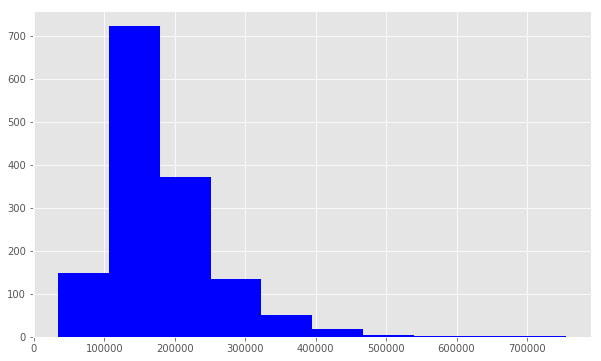

In [90]:
train = pd.read_csv('train.csv')
train.SalePrice.describe()

#Next, we'll check for skewness
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()


Skew is: 0.12133506220520406


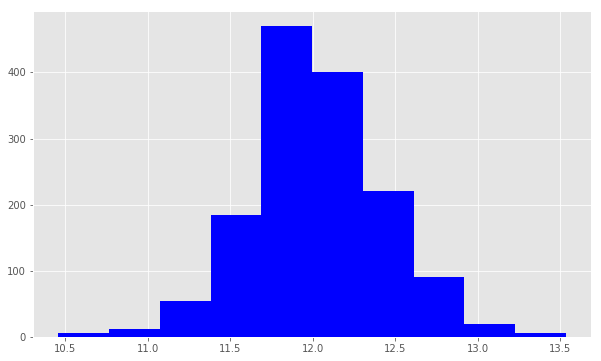

In [91]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()


In [92]:
#Working with Numeric Features
numeric_features = train.select_dtypes(include=[np.number])

corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
print(quality_pivot)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


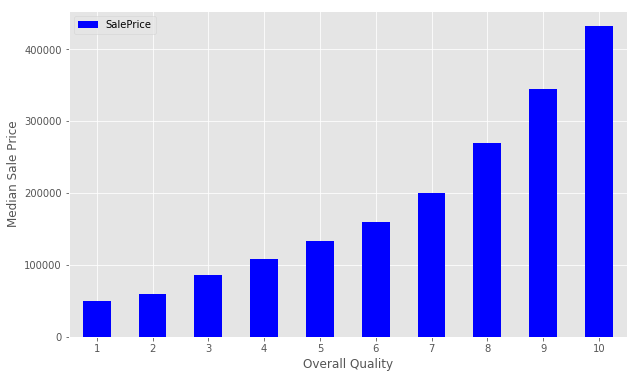

In [93]:
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [94]:
##Null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

##handling missing value
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

              Null Count
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0
0


In [95]:
##Build a linear model
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.8627547060335271
RMSE is: 
 0.023390905304161914


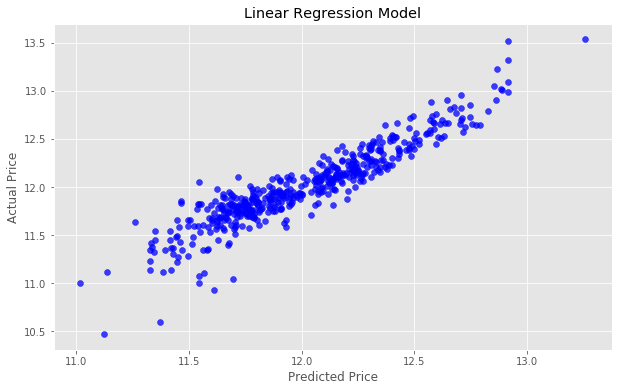

In [96]:
##visualize

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


### Now, Identify and delete outliers for the “GarageArea” field in predicting SalePrice 

Mean before removing outliers :  472.9801369863014


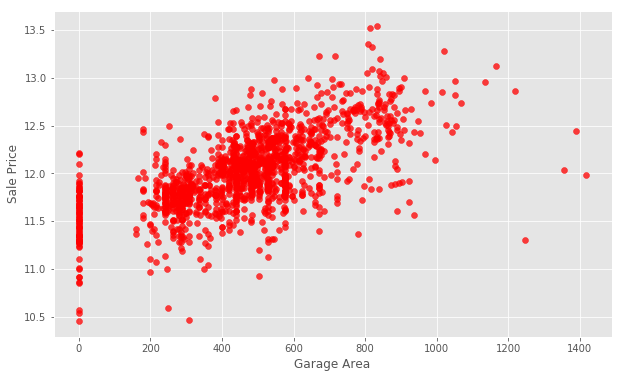

In [97]:
x = train['GarageArea']
# Before removing the outliers
garage_area = np.asarray(x)
print ("Mean before removing outliers : ", garage_area.mean())
plt.scatter(x, y, alpha=.75, color='r') #alpha helps to show overlapping data
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

From the above plot, it is observed that the points in garage_area(200,1200) are desried and result in a decent means score, where as the points in garage area < 200 and garage area > are considered as outliers which are to be deleted

Mean after removing outliers :  501.5095729013255


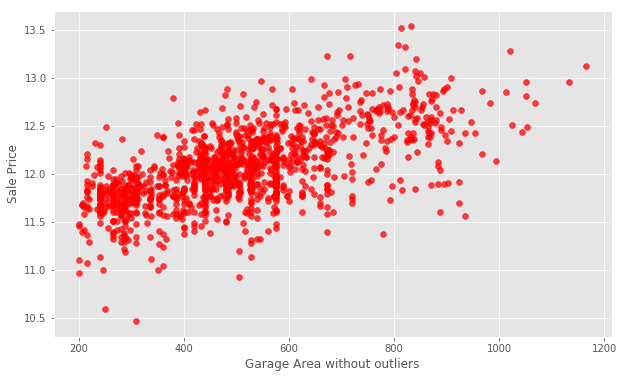

In [101]:
train = train[train['GarageArea'] >= 200]
train = train[train['GarageArea'] <= 1200]
x = train['GarageArea']
y = np.log(train.SalePrice)
print ("Mean after removing outliers : ", x.mean())
plt.scatter(x, y, alpha=.75, color='r') #alpha helps to show overlapping data
plt.xlabel('Garage Area without outliers')
plt.ylabel('Sale Price')
plt.show()

## 2. Create a Multiple Linear Regression model for weather dataset

This is the second problem of ICP 6, where multiple linear regression model is built on weather dataset - where temperature and humidty are considered as target variables.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("weatherHistory.csv")
# take a look at the dataset
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Skew function is used to find the range of temperatures. When the range is high, this can be used to interpret the data & apply log on this value (our target) to get scaled results

Skew is: 0.09412658234566344


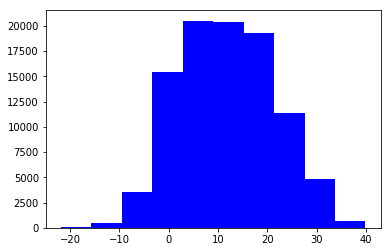

In [10]:
print ("Skew is:", df['Temperature (C)'].skew())
plt.hist(df['Temperature (C)'], color='blue')
plt.show()

In [21]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [22]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                          Null Count
Feature                             
Precip Type                      517
Daily Summary                      0
Pressure (millibars)               0
Loud Cover                         0
Visibility (km)                    0
Wind Bearing (degrees)             0
Wind Speed (km/h)                  0
Humidity                           0
Apparent Temperature (C)           0
Temperature (C)                    0
Summary                            0


In [23]:
data = numeric_features.interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


In [26]:
categorical_features = df.select_dtypes(exclude=[np.number])
categorical_features.describe()

,Summary,Precip Type,Daily Summary
count,96453,95936,96453
unique,27,2,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31733,85224,20085


In [27]:
print(df.Summary.value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [29]:
df['Summary'] = pd.get_dummies(df.Summary, drop_first=True)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,0,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,0,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,0,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,0,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


### Train and Test Data - Attempt 1
Here, target column 'Temperature (c)' is filtered into y. Drop irrelevant data which does not signify the regression equation (y = m1x1 + m2x2 + .. + c). Then we split the data into test, train datasets

In [49]:
y = df['Temperature (C)']
x = df.drop(['Visibility (km)','Temperature (C)','Precip Type','Wind Bearing (degrees)','Loud Cover','Daily Summary','Wind Speed (km/h)'], axis=1)
print(x.columns.values)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.20)

['Summary' 'Apparent Temperature (C)' 'Humidity' 'Pressure (millibars)']


In [50]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
y_predicted = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


R^2 is: 
 0.9873719360965281
RMSE is: 
 3.3406718344330716e-28


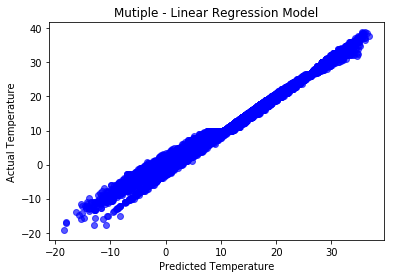

In [51]:
plt.scatter(y_predicted, y_test, alpha=.65,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Temperature')
plt.ylabel('Actual Temperature')
plt.title('Mutiple - Linear Regression Model')
plt.show()


### Train & Test - Attempt 2 (Bad Fit)
Previously Temperature was chose as target value. Lets choose the summary as target value & predict the summary and compare the results


In [64]:
y = df['Humidity']
x = df.drop(['Humidity','Precip Type','Wind Bearing (degrees)','Loud Cover','Daily Summary','Wind Speed (km/h)', 'Visibility (km)'], axis=1)
print(x.columns.values)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.20)

['Summary' 'Temperature (C)' 'Apparent Temperature (C)'
 'Pressure (millibars)']


In [65]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
y_predicted = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.44077547020450364
RMSE is: 
 218.8864923049824


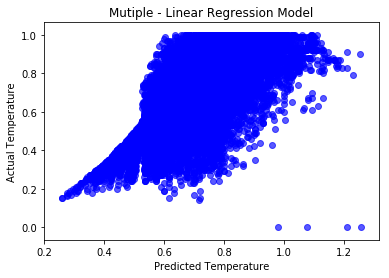

In [66]:
plt.scatter(y_predicted, y_test, alpha=.65,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Temperature')
plt.ylabel('Actual Temperature')
plt.title('Mutiple - Linear Regression Model')
plt.show()